In [13]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X=df.drop(columns=['species'])
Y=df[['species']]

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=14)

In [8]:
from sklearn.tree import DecisionTreeClassifier
DLC=DecisionTreeClassifier()
DLC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [9]:
Y_pred=DLC.predict(X_test)

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 35, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[3] <= 1.75\ngini = 0.499\nsamples = 74\nvalue = [0.0, 35.0, 39.0]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[2] <= 5.05\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

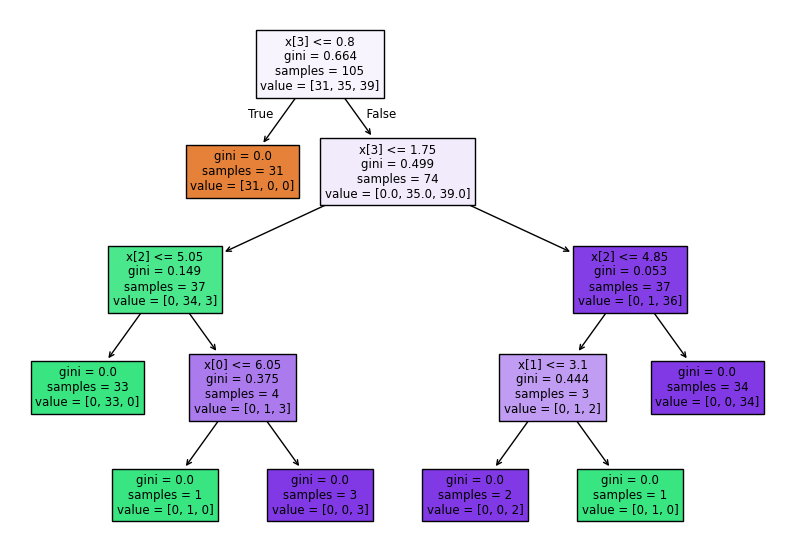

In [11]:
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(DLC,filled=True)

In [14]:
print("Accuracy -->",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix -->",confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Accuracy --> 0.9555555555555556
Confusion Matrix --> [[19  0  0]
 [ 0 15  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



 Pre pruning And HyperparameterTuning

In [15]:
params={
	'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [17]:
from sklearn.model_selection import GridSearchCV
DLC=DecisionTreeClassifier()
grid=GridSearchCV(estimator=DLC,param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
Y_pred=grid.predict(X_test)

In [22]:
print("Accuracy -->",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix -->",confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

Accuracy --> 0.9555555555555556
Confusion Matrix --> [[19  0  0]
 [ 0 15  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45

